# KNN Estimator for Banking Segment 

In most of the banks, the clients are segmented into categories. This classification is made by looking into an amount of demographic data. We need to develop a model to, given the demographic and financial data of one client, the model should determine what segment this client is more fit in. 

# The dataset


This dataset is from Kaggle. We can access here on this [link](https://www.kaggle.com/datasets/thedevastator/predicting-credit-card-customer-attrition-with-m)





# Importing libreries and the dataset

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
dataset = pd.read_csv('datasets/preprocessed_dataset.csv')
dataset.head()

,Unnamed: 0,Customer_Id,Attrition_Flag,Customer_Age,Customer_Gender,Dependent_Count,Education_Level,Marital_Status,Income_Category,Card_Category,...,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,N-B_class_1,N-B_class_2,Marital_Status_0,Marital_Status_1,Marital_Status_2,Marital_Status_3
0,0,768805383,Existing Customer,-0.156190,1,0.509985,2,Married,3,1,...,-0.999456,-1.163844,1.625,-0.863732,-0.656780,0.680286,0.0,1.0,0.0,0.0
1,1,818770008,Existing Customer,0.338818,0,2.044726,4,Single,1,1,...,-0.957606,-1.556554,3.714,-0.702295,-0.917399,0.893754,0.0,0.0,1.0,0.0
2,2,713982108,Existing Customer,0.586322,1,0.509985,4,Married,4,1,...,-0.787930,-2.123802,2.333,-1.087543,-1.172269,1.178379,0.0,1.0,0.0,0.0
3,3,769911858,Existing Customer,-0.774949,0,1.277356,2,Unknown,1,1,...,-0.991770,-2.123802,2.333,1.700918,-0.370340,0.395662,0.0,0.0,0.0,1.0
4,4,709106358,Existing Customer,-0.774949,1,0.509985,1,Married,3,1,...,-1.092835,-1.774727,2.500,-1.087543,-1.168031,1.178379,0.0,1.0,0.0,0.0


This dataset is already preprocessed in another notebook. So we will bypass the first analysis step and go straight to the model building. 

# KNN Estimator

Now we have our dataset prepared. <br>We can start to develop our KNN Estimator model.<br> First, we will drop the columns we are not using: "Customer_Id", "Attrition_Flag", and "Marital_Status". Then we will separate our features columns from the target column ("Card_Category"), and after that, we will split them for train and test. 

In [5]:
features_list = ['Customer_Age',                
                 'Customer_Gender',             
                 'Dependent_Count',            
                 'Education_Level',            
                 'Marital_Status_0',
                 'Marital_Status_1',
                 'Marital_Status_2',
                 'Marital_Status_3',         
                 'Income_Category',            
                 'Months_on_book',             
                 'Total_Relationship_Count',   
                 'Months_Inactive_12_mon',     
                 'Contacts_Count_12_mon',      
                 'Credit_Limit',               
                 'Total_Revolving_Bal',        
                 'Avg_Open_To_Buy',            
                 'Total_Trans_Amt',            
                 'Total_Trans_Ct',             
                 'Avg_Utilization_Ratio',
                 'N-B_class_1',
                 'N-B_class_2']      
            
features = dataset[features_list]
features.head()

,Customer_Age,Customer_Gender,Dependent_Count,Education_Level,Marital_Status_0,Marital_Status_1,Marital_Status_2,Marital_Status_3,Income_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Trans_Amt,Total_Trans_Ct,Avg_Utilization_Ratio,N-B_class_1,N-B_class_2
0,-0.156190,1,0.509985,2,0.0,1.0,0.0,0.0,3,0.388889,...,-1.252865,0.595213,0.436364,-0.632973,0.489013,-0.999456,-1.163844,-0.863732,-0.656780,0.680286
1,0.338818,0,2.044726,4,0.0,0.0,1.0,0.0,1,1.012227,...,-1.252865,-0.329538,-0.051833,-0.518152,-0.008614,-0.957606,-1.556554,-0.702295,-0.917399,0.893754
2,0.586322,1,0.509985,4,0.0,1.0,0.0,0.0,4,0.014887,...,-1.252865,-2.179040,-0.584393,-1.658444,-0.445935,-0.787930,-2.123802,-1.087543,-1.172269,1.178379
3,-0.774949,0,1.277356,2,0.0,0.0,0.0,1.0,1,-0.234448,...,1.697912,-1.254289,-0.595951,1.663448,-0.734475,-0.991770,-2.123802,1.700918,-0.370340,0.395662
4,-0.774949,1,0.509985,1,0.0,1.0,0.0,0.0,3,-1.855126,...,-1.252865,-2.179040,-0.441511,-1.658444,-0.303096,-1.092835,-1.774727,-1.087543,-1.168031,1.178379


In [6]:
target = dataset['Card_Category']

Now we are doing the train/test split

In [7]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(features, target, test_size = 0.20, random_state=42)

Once we had the train/test split we need to find the best K to set the number of neighbors for the KNN estimator. I will test 30 values of K. 

In [8]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

final_score = []
best_score = 0
best_k = 0

for k in range(1,31):
  knn = KNeighborsClassifier(n_neighbors = k)
  scores = cross_val_score(knn, x_train, y_train)

  mScore = np.mean(scores)
  final_score.append(mScore)

  print('K:', k)
  print('Score:', mScore)

  if mScore > best_score:
    best_score = mScore
    best_k = k

  print('Best score: ', best_score)
  print('Best K: ', best_k)

K: 1
Score: 0.9214705882352942
Best score:  0.9214705882352942
Best K:  1
K: 2
Score: 0.9335294117647059
Best score:  0.9335294117647059
Best K:  2
K: 3
Score: 0.9322058823529412
Best score:  0.9335294117647059
Best K:  2
K: 4
Score: 0.9330882352941178
Best score:  0.9335294117647059
Best K:  2
K: 5
Score: 0.9324999999999999
Best score:  0.9335294117647059
Best K:  2
K: 6
Score: 0.9338235294117647
Best score:  0.9338235294117647
Best K:  6
K: 7
Score: 0.9327941176470589
Best score:  0.9338235294117647
Best K:  6
K: 8
Score: 0.9341176470588236
Best score:  0.9341176470588236
Best K:  8
K: 9
Score: 0.9344117647058823
Best score:  0.9344117647058823
Best K:  9
K: 10
Score: 0.9342647058823529
Best score:  0.9344117647058823
Best K:  9
K: 11
Score: 0.9339705882352941
Best score:  0.9344117647058823
Best K:  9
K: 12
Score: 0.9344117647058823
Best score:  0.9344117647058823
Best K:  9
K: 13
Score: 0.9348529411764706
Best score:  0.9348529411764706
Best K:  13
K: 14
Score: 0.934264705882353
Be

In [9]:
print('Best score: ', best_score)
print('Best K: ', best_k)

Best score:  0.9351470588235294
Best K:  17


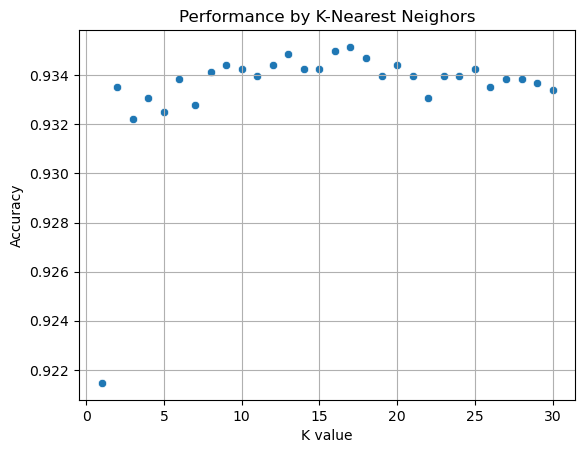

In [10]:
sns.scatterplot(x=range(1,31),y=final_score)
plt.xlabel("K value")
plt.ylabel("Accuracy")
plt.title("Performance by K-Nearest Neighors")
plt.grid(True)
plt.show()

As we can see the best K is 17. So we will fit our model to 17-Nearest Neighors

In [11]:
knn = KNeighborsClassifier(n_neighbors = 17)

knn.fit(x_train, y_train)

pred = knn.predict(x_test)

# Accuracy

Now I will use the accuracy_score to see how accurate our model is. 

In [12]:
from sklearn.metrics import accuracy_score

In [13]:
acc = accuracy_score(y_test, pred)
print(f'The accuracy of the model is: {round(acc,3)}')

The accuracy of the model is: 0.941


We have a highly accurate model. This is great, but not all. As you can remember our target categories are not balanced. We have a lot of people categorized as 'Blue' and just a little group of people categorized as 'Platinum'. In fact, we have 93% of clients in the "Blue" category, i.e., if our model sets everyone to the 'Blue' category it will have a 93% accuracy. But when we look at the other categories our model will perform pretty badly, for the accuracy for the other categories will be 0% in this case. 
To have a better notion on how our model perform in all categories we ca use a Confusion Matrix.  

# Confusion Matrix

A Confusion Matrix, also known as Error Matrix, is a specific table layout that allows visualization of the performance of an algorithm.

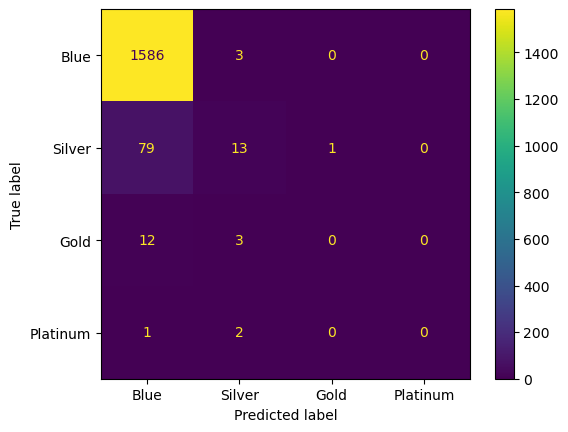

In [14]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
confusion_matrix = confusion_matrix(y_pred=pred, y_true=y_test)
cm_display = ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ['Blue', 'Silver', 'Gold', 'Platinum'])

cm_display.plot()
plt.show()

As we imaginated, and confirmed by the confusion matrix, our model sets a lot of people to the 'Blue' category.<br> This makes our model highly accurate, but only for one category, for other categories our accuracy is low, and is 0% on 'Platinum' category. <br>


# Balanced Accuracy

We already saw that our model looked like it was doing a great job, but when we had a deeper look at it, this job was not so great.<br>
This happens because our dataset is unbalanced, and the accuracy metric is sensible to the balance of the datasets. So we have one different accuracy metric to use on unbalanced datasets. The name, obviously, *'balanced_accuracy'*. We will test to see how the accuracy and the balanced accuracy are different on this case. 

In [18]:
from sklearn.metrics import balanced_accuracy_score

bacc = balanced_accuracy_score(y_test,pred)
print(f'The accuracy of the model is: {round(bacc,3)}')


The accuracy of the model is: 0.284


As we expected, the balaced accuracy is 28% realy lower than the 94% of the accuray unbaleced.

Now, I want to see if ther is another K value that imporve our balanced accuracy, so lets check. 

In [21]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

final_score = []
best_score = 0
best_k = 0

for k in range(1,31):
  knn = KNeighborsClassifier(n_neighbors = k)
  scores = cross_val_score(knn, x_train, y_train, scoring='balanced_accuracy')

  mScore = np.mean(scores)
  final_score.append(mScore)

  print('K:', k)
  print('Score:', mScore)

  if mScore > best_score:
    best_score = mScore
    best_k = k

  print('Best score: ', best_score)
  print('Best K: ', best_k)

K: 1
Score: 0.35200005911435767
Best score:  0.35200005911435767
Best K:  1
K: 2
Score: 0.2953011549934913
Best score:  0.35200005911435767
Best K:  1
K: 3
Score: 0.31782585896160515
Best score:  0.35200005911435767
Best K:  1
K: 4
Score: 0.2951890424985811
Best score:  0.35200005911435767
Best K:  1
K: 5
Score: 0.3024517741455243
Best score:  0.35200005911435767
Best K:  1
K: 6
Score: 0.2910643336747917
Best score:  0.35200005911435767
Best K:  1
K: 7
Score: 0.2895508533007584
Best score:  0.35200005911435767
Best K:  1
K: 8
Score: 0.2849595072812128
Best score:  0.35200005911435767
Best K:  1
K: 9
Score: 0.288748772935467
Best score:  0.35200005911435767
Best K:  1
K: 10
Score: 0.2837621387779998
Best score:  0.35200005911435767
Best K:  1
K: 11
Score: 0.2818278865963966
Best score:  0.35200005911435767
Best K:  1
K: 12
Score: 0.28009132531514236
Best score:  0.35200005911435767
Best K:  1
K: 13
Score: 0.2802098399483901
Best score:  0.35200005911435767
Best K:  1
K: 14
Score: 0.2775

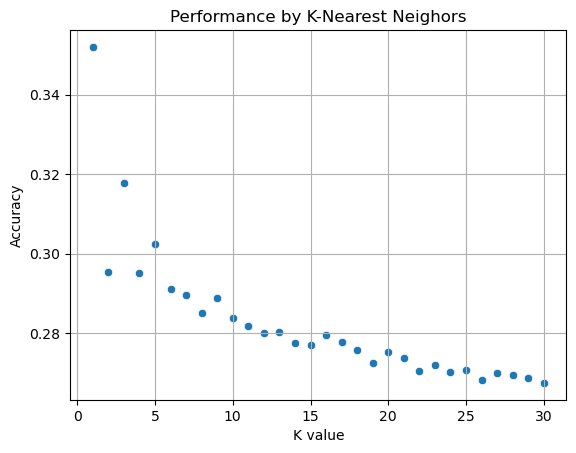

In [22]:
sns.scatterplot(x=range(1,31),y=final_score)
plt.xlabel("K value")
plt.ylabel("Accuracy")
plt.title("Performance by K-Nearest Neighors")
plt.grid(True)
plt.show()

There is an intresting fact: the higher value of K the less accurate the model is.<br>
This happens because, the greater the neighborhood of a point, the greater the chance of having several people classified as the 'Blue' category, and in this case the model interprets that that point should also be in the 'Blue' category, making the classification wrong.


Therefore, when we have very unbalanced data and a non-binary classification, a KNN model may not be the best one to use.


Let's try another approach to our model. 

Follow me to see other approaches when I update the project.

# Thank you!